In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
Data=pd.read_csv(r"/content/APA.csv")

In [3]:
Data.head(10)

year  total
0  1968  37.05
1  1969  37.11
2  1970  37.18
3  1971  37.31
4  1972  37.44
5  1973  37.58
6  1974  37.70
7  1975  37.81
8  1976  37.93
9  1977  38.07

Text(0, 0.5, 'Average Population Age')

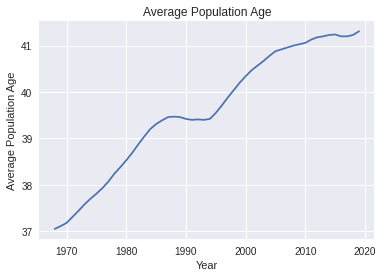

In [4]:
plt.plot(Data["year"],Data["total"])
plt.title('Average Population Age')
plt.xlabel('Year')
plt.ylabel('Average Population Age')

In [5]:
Data['diff_1'] = Data['total'].diff()  ##By lag=1
Data['diff_2'] = Data['total'].diff(periods=2) ##By lag=1
Data['diff_3'] = Data['total'].diff(periods=3) ##By lag=1
Data.head(5)

year  total  diff_1  diff_2  diff_3
0  1968  37.05     NaN     NaN     NaN
1  1969  37.11    0.06     NaN     NaN
2  1970  37.18    0.07    0.13     NaN
3  1971  37.31    0.13    0.20    0.26
4  1972  37.44    0.13    0.26    0.33

In [6]:
#Drop NaN Values from Newly Generated Dataset
Data_final=Data.dropna()

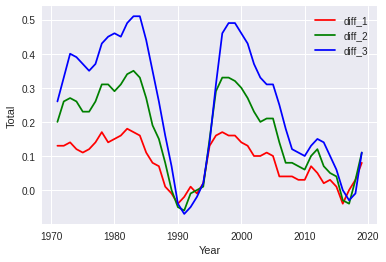

In [7]:
plt.plot(Data_final["year"],Data_final["diff_1"],color='red',label ='diff_1')
plt.plot(Data_final["year"],Data_final["diff_2"],color='green',label ='diff_2')
plt.plot(Data_final["year"],Data_final["diff_3"],color='blue',label ='diff_3')
plt.xlabel("Year")
plt.ylabel("Total")
plt.legend()

In [8]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
values = Data["total"].values
res = adfuller(values)
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -1.500795
p-value: 0.533118
critical values at different levels:
	1%: -3.581
	5%: -2.927
	10%: -2.602


In [10]:
values = Data_final["diff_1"].values
res = adfuller(values)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -2.839892
p-value: 0.052798
critical values at different levels:
	1%: -3.585
	5%: -2.928
	10%: -2.602


In [11]:
values = Data_final["diff_2"].values
res = adfuller(values,autolag='AIC')
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -2.534642
p-value: 0.107271
critical values at different levels:
	1%: -3.601
	5%: -2.935
	10%: -2.606


In [12]:
values = Data_final["diff_3"].values
res = adfuller(values)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -3.092805
p-value: 0.027090
critical values at different levels:
	1%: -3.601
	5%: -2.935
	10%: -2.606


In [13]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

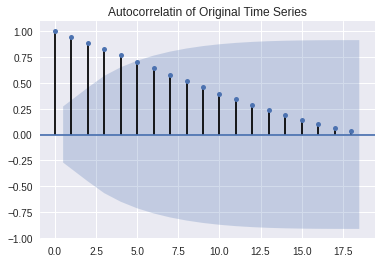

In [20]:
plot_acf(Data["total"])
plt.title("Autocorrelatin of Original Time Series")
plt.show()

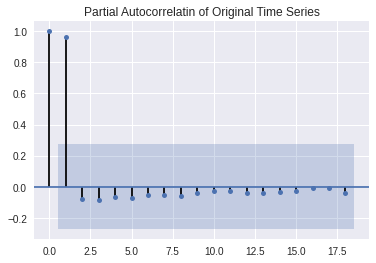

In [21]:
plot_pacf(Data["total"])
plt.title("Partial Autocorrelatin of Original Time Series")
plt.show()

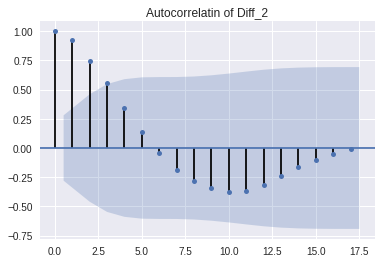

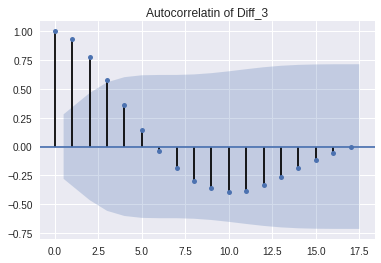

In [22]:
plot_acf(Data_final["diff_1"])
plt.title("Autocorrelatin of Diff_1")
plt.show()
plot_acf(Data_final["diff_2"])
plt.title("Autocorrelatin of Diff_2")
plt.show()
plot_acf(Data_final["diff_3"])
plt.title("Autocorrelatin of Diff_3")
plt.show()

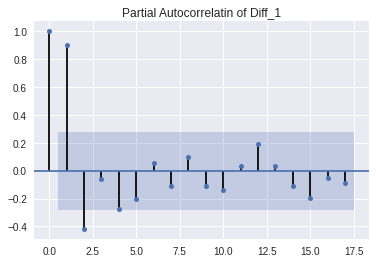

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


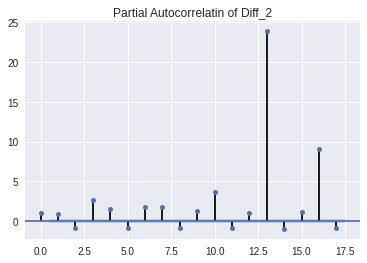

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


In [23]:
plot_pacf(Data_final["diff_1"])
plt.title("Partial Autocorrelatin of Diff_1")
plt.show()
plot_pacf(Data_final["diff_2"])
plt.title("Partial Autocorrelatin of Diff_2")
plt.show()
plot_pacf(Data_final["diff_3"])
plt.title("Partial Autocorrelatin of Diff_3")
plt.show()

In [24]:
Data_final

year  total  diff_1  diff_2  diff_3
3   1971  37.31    0.13    0.20    0.26
4   1972  37.44    0.13    0.26    0.33
5   1973  37.58    0.14    0.27    0.40
6   1974  37.70    0.12    0.26    0.39
7   1975  37.81    0.11    0.23    0.37
8   1976  37.93    0.12    0.23    0.35
9   1977  38.07    0.14    0.26    0.37
10  1978  38.24    0.17    0.31    0.43
11  1979  38.38    0.14    0.31    0.45
12  1980  38.53    0.15    0.29    0.46
13  1981  38.69    0.16    0.31    0.45
14  1982  38.87    0.18    0.34    0.49
15  1983  39.04    0.17    0.35    0.51
16  1984  39.20    0.16    0.33    0.51
17  1985  39.31    0.11    0.27    0.44
18  1986  39.39    0.08    0.19    0.35
19  1987  39.46    0.07    0.15    0.26
20  1988  39.47    0.01    0.08    0.16
21  1989  39.46   -0.01    0.00    0.07
22  1990  39.42   -0.04   -0.05   -0.04
23  1991  39.40   -0.02   -0.06   -0.07
24  1992  39.41    0.01   -0.01   -0.05
25  1993  39.40   -0.01    0.00   -0.02
26  1994  39.42    0.02    0.01    0.02
27  1995  39.55    0.13    0.15    0.14
28  1996  39.71    0.16    0.29    0.31
29  1997  39.88    0.17    0.33    0.46
30  1998  40.04    0.16    0.33    0.49
31  1999  40.20    0.16    0.32    0.49
32  2000  40.34    0.14    0.30    0.46
33  2001  40.47    0.13    0.27    0.43
34  2002  40.57    0.10    0.23    0.37
35  2003  40.67    0.10    0.20    0.33
36  2004  40.78    0.11    0.21    0.31
37  2005  40.88    0.10    0.21    0.31
38  2006  40.92    0.04    0.14    0.25
39  2007  40.96    0.04    0.08    0.18
40  2008  41.00    0.04    0.08    0.12
41  2009  41.03    0.03    0.07    0.11
42  2010  41.06    0.03    0.06    0.10
43  2011  41.13    0.07    0.10    0.13
44  2012  41.18    0.05    0.12    0.15
45  2013  41.20    0.02    0.07    0.14
46  2014  41.23    0.03    0.05    0.10
47  2015  41.24    0.01    0.04    0.06
48  2016  41.20   -0.04   -0.03    0.00
49  2017  41.20    0.00   -0.04   -0.03
50  2018  41.23    0.03    0.03   -0.01
51  2019  41.31    0.08    0.11    0.11

In [25]:
from statsmodels.tsa.arima_model import ARMA

In [31]:
armamodel=ARMA(Data_final['diff_3'], order=(1,1))
ArmaFit=armamodel.fit(disp=False)
predicted=ArmaFit.predict(20,55)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [32]:
predicted=pd.DataFrame(predicted)

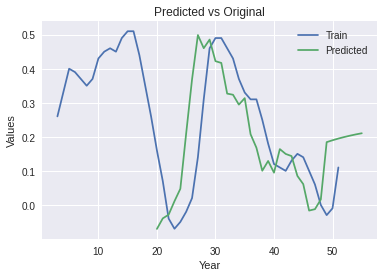

In [55]:
plt.plot(Data_final['diff_3'],label='Train')
plt.plot(predicted,label='Predicted')
plt.title('Predicted vs Original')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()

**Next Five Year Prediction**

In [51]:
predicted[25:]

0
45  0.061021
46 -0.016651
47 -0.012514
48  0.015948
49  0.184336
50  0.189860
51  0.194851
52  0.199359
53  0.203432
54  0.207111
55  0.210435